Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [86]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import activations


from keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,  Activation, BatchNormalization
from keras.optimizers import RMSprop, Adam

In [87]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### plotting just one random  image

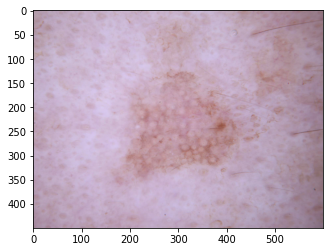

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026040.jpg')
imgplot = plt.imshow(img)
plt.show()

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [89]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [90]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [91]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [92]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [93]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
  
)



Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [94]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
  
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [95]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

actinic keratosis
basal cell carcinoma
dermatofibroma
melanoma
nevus
pigmented benign keratosis
seborrheic keratosis
squamous cell carcinoma
vascular lesion


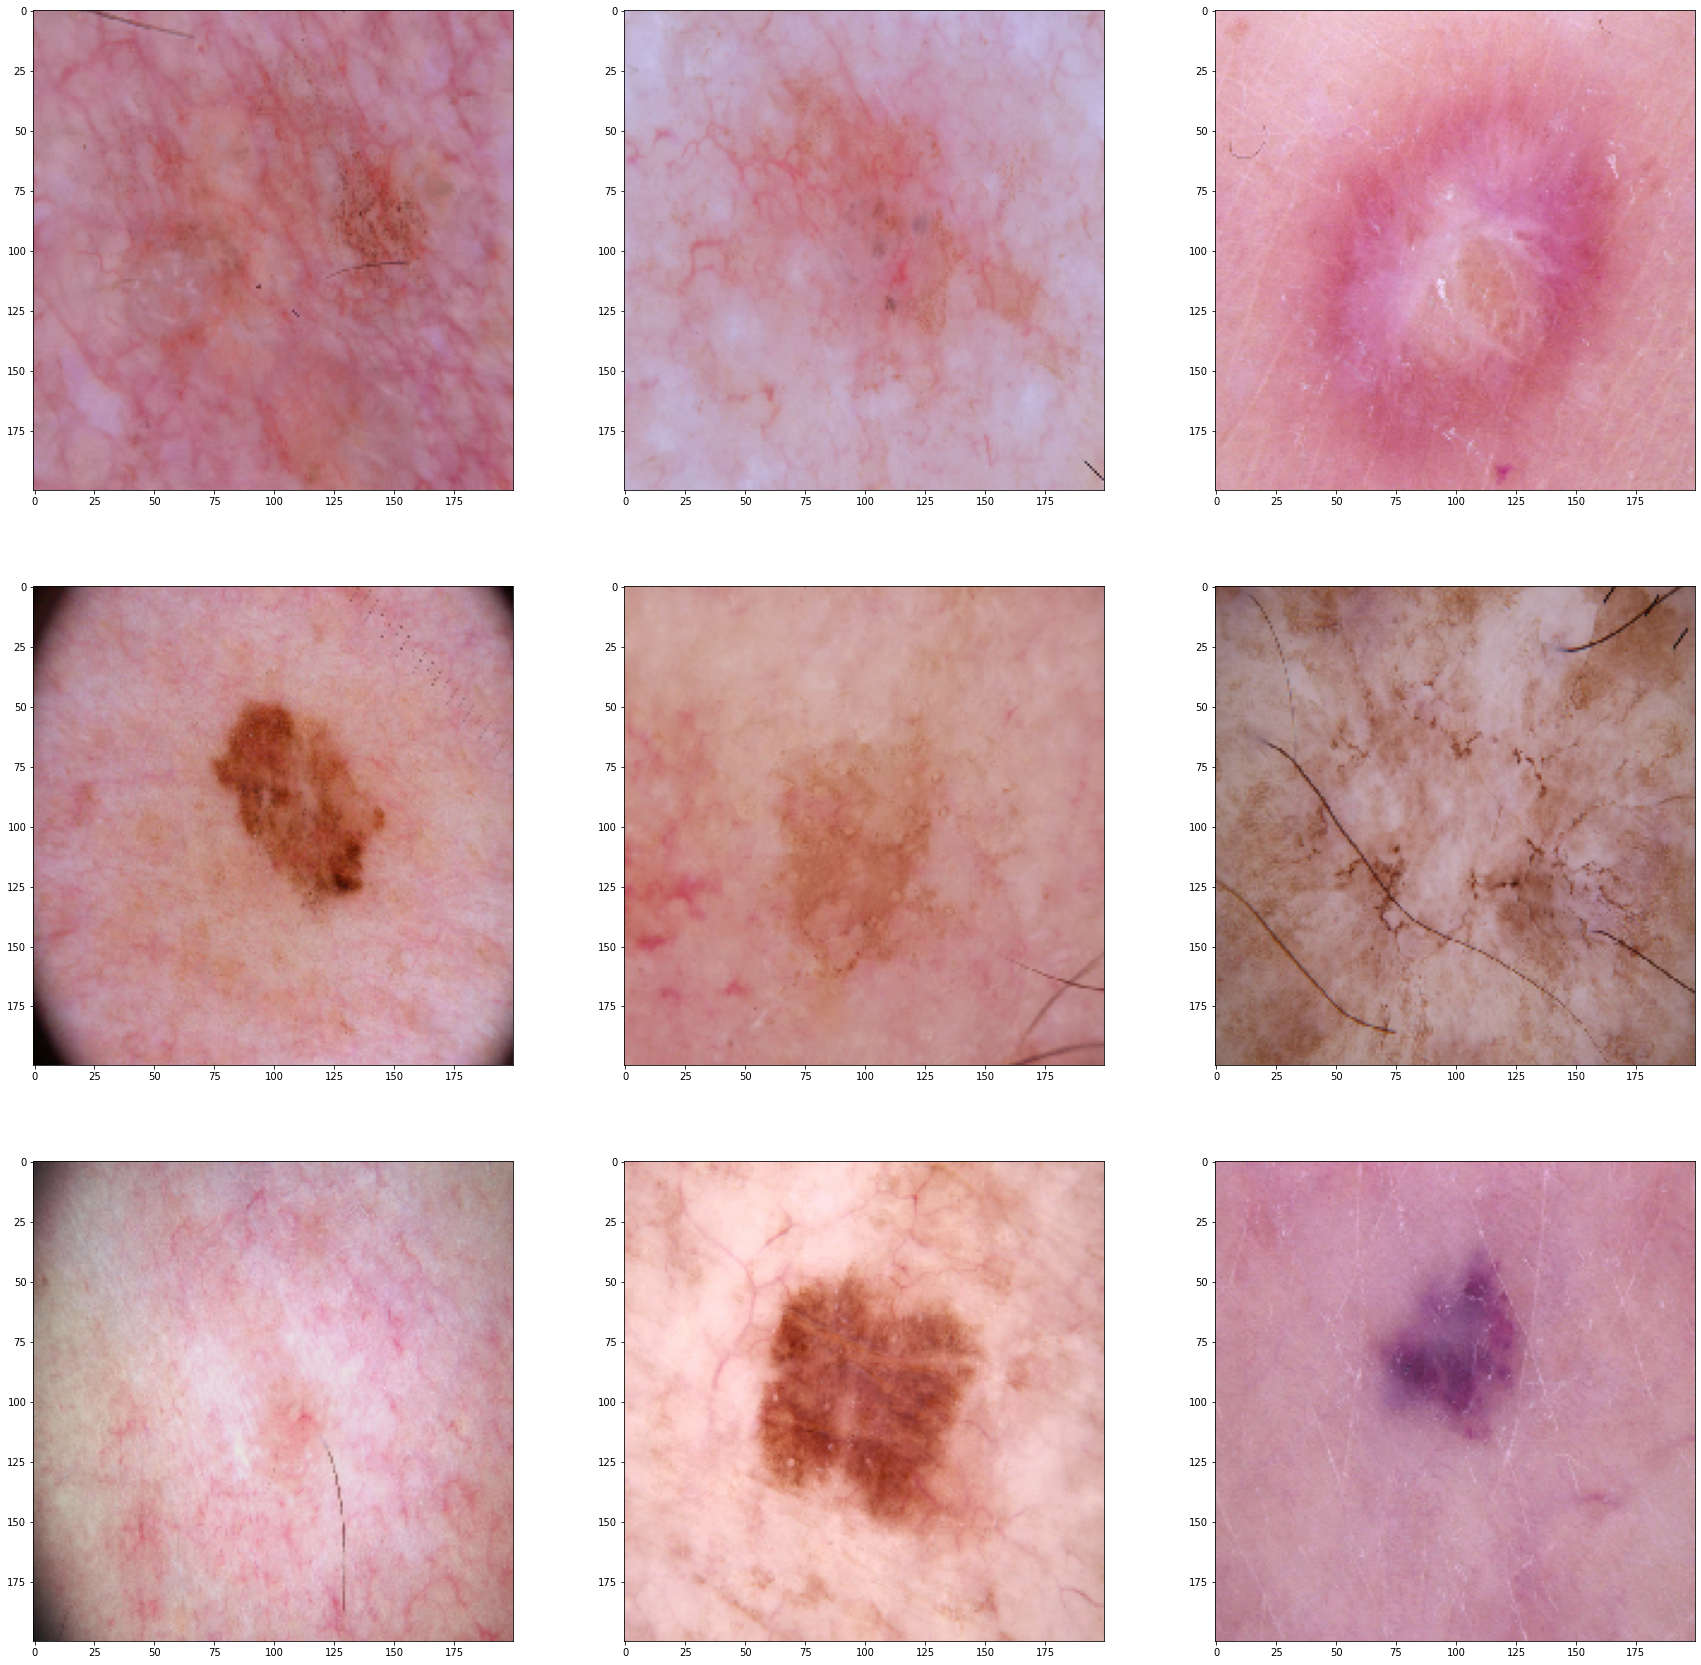

In [96]:
import matplotlib.pyplot as plt
import os
import random
plt.figure(figsize=(30,30))
for i ,j in  zip(range(len(class_names)),class_names):
  
  file=random.choice(os.listdir(os.path.join(data_dir_train,j)))
  plt.subplot(3,3,i+1)

  a= tf.keras.utils.load_img(
        os.path.join(data_dir_train,j,file),
        grayscale=False,
        color_mode='rgb',
        target_size=(200,200),
        interpolation='nearest',
        keep_aspect_ratio=False
)
  plt.imshow(a)
  print(j)
    
### your code goes here, you can use training or validation data to visualize

## The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [97]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [98]:
len(train_ds),len(val_ds)

(56, 14)

In [99]:
### Your code goes here

# model architecture
model = Sequential()

model.add(Rescaling(1./255))
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=(180,180,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(class_names),activation="softmax"))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [100]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [101]:
# View the summary of all layers
model.build((1,180,180,3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (1, 180, 180, 3)          0         
                                                                 
 conv2d_28 (Conv2D)          (1, 180, 180, 64)         1792      
                                                                 
 batch_normalization_24 (Bat  (1, 180, 180, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (1, 178, 178, 64)         36928     
                                                                 
 batch_normalization_25 (Bat  (1, 178, 178, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (1, 89, 89, 64)         

### Train the model

In [102]:


epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 27s 278ms/step - loss: 5.5997 - accuracy: 0.2963 - val_loss: 3.6275 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 14s 246ms/step - loss: 2.2416 - accuracy: 0.3432 - val_loss: 6.0036 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 14s 242ms/step - loss: 1.7195 - accuracy: 0.4169 - val_loss: 6.8845 - val_accuracy: 0.2595
Epoch 4/20
56/56 [==============================] - 13s 241ms/step - loss: 1.5325 - accuracy: 0.4693 - val_loss: 14.3219 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 13s 240ms/step - loss: 1.4707 - accuracy: 0.5022 - val_loss: 15.6998 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 13s 241ms/step - loss: 1.3728 - accuracy: 0.5140 - val_loss: 10.9050 - val_accuracy: 0.2371
Epoch 7/20
56/56 [==============================] - 14s 242ms/step - loss: 1.3220 - accuracy: 0.5396 - val_loss: 5.1830 - val_accuracy: 0.2

### Visualizing training results

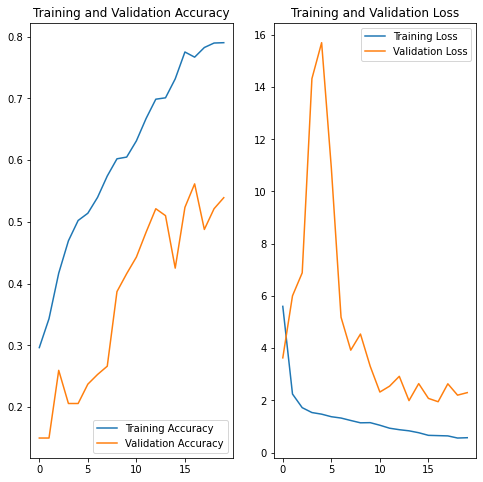

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

###the training accuracy is much higher than test accuracy so model is mugging up data which means overfitting is happening.

### Next Part

In [106]:
i,j = next(iter(train_ds))
i.shape

TensorShape([32, 180, 180, 3])

## for data augmentation we use two strategies one is random flipping and other is random rotation.

In [107]:
images, label = next(iter(train_ds))
image=images[0]
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(.5, .2),
  layers.RandomBrightness(factor=0.2)

])


# Add the image to a batch.
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

In [108]:
model = Sequential()
# Add the preprocessing layers you created earlier.
model.add(data_augmentation)
model.add(resize_and_rescale)

model.add(Conv2D(32, (3,3), padding='same',activation="relu"))
model.add(Conv2D(32, (3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation="relu"))
model.add(Conv2D(64, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(class_names),activation="softmax"))




In [109]:
"""#batch_size=32
IMG_SIZE=180
def augment(image, label):
  print(image.shape)
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (IMG_SIZE,IMG_SIZE))
  image = (image / 255.0)
  image = tf.image.random_brightness(image, max_delta=0.5)
  image =tf.image.random_flip_left_right(image)
  image= tf.image.random_flip_up_down(image)
  image= tf.image.rot90(image)
  return image, label


train_ds = train_ds.shuffle(1000) .map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE) """

'#batch_size=32\nIMG_SIZE=180\ndef augment(image, label):\n  print(image.shape)\n  image = tf.cast(image, tf.float32)\n  image = tf.image.resize(image, (IMG_SIZE,IMG_SIZE))\n  image = (image / 255.0)\n  image = tf.image.random_brightness(image, max_delta=0.5)\n  image =tf.image.random_flip_left_right(image)\n  image= tf.image.random_flip_up_down(image)\n  image= tf.image.rot90(image)\n  return image, label\n\n\ntrain_ds = train_ds.shuffle(1000) .map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE) '

### Todo:
### Create the model, compile and train the model


### Compiling the model

In [110]:
## Your code goes here
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [111]:
#model.summary()

### Training the model

In [112]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 22s 250ms/step - loss: 2.4303 - accuracy: 0.1942 - val_loss: 2.0387 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 14s 246ms/step - loss: 2.0274 - accuracy: 0.1925 - val_loss: 1.9913 - val_accuracy: 0.2327
Epoch 3/20
56/56 [==============================] - 14s 244ms/step - loss: 1.9849 - accuracy: 0.2109 - val_loss: 1.9218 - val_accuracy: 0.3244
Epoch 4/20
56/56 [==============================] - 14s 244ms/step - loss: 1.9707 - accuracy: 0.2489 - val_loss: 1.9110 - val_accuracy: 0.2013
Epoch 5/20
56/56 [==============================] - 14s 246ms/step - loss: 1.9736 - accuracy: 0.2500 - val_loss: 1.8769 - val_accuracy: 0.3221
Epoch 6/20
56/56 [==============================] - 14s 244ms/step - loss: 1.8523 - accuracy: 0.3253 - val_loss: 1.6580 - val_accuracy: 0.4362
Epoch 7/20
56/56 [==============================] - 14s 245ms/step - loss: 1.9000 - accuracy: 0.3019 - val_loss: 1.8720 - val_accuracy: 0.3423
Epoch 8/20

### Visualizing the results

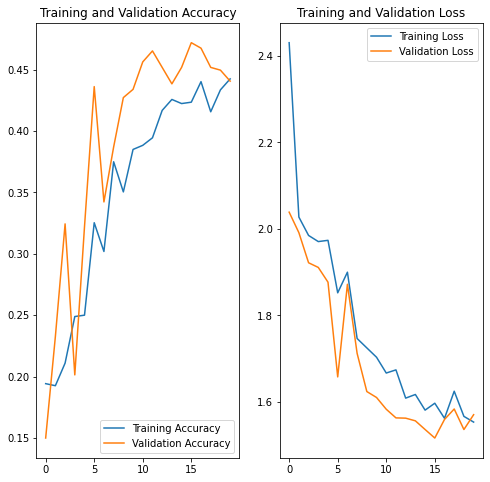

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## there is no evidence of overfitting  as both train and test are performing same but overall model is not performing well.However there is slight increase
##in validattion accuracy and huge decrease in train accuracy. 

---



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

## Part 3

In [115]:

for  i in  class_names:
    newdir=os.path.join(data_dir_train,i)
    _, _, files = next(os.walk(newdir))
    file_count = len(files) 
    print( i,file_count)


actinic keratosis 114
basal cell carcinoma 376
dermatofibroma 95
melanoma 438
nevus 357
pigmented benign keratosis 462
seborrheic keratosis 77
squamous cell carcinoma 181
vascular lesion 139


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


## seborrheic keratosis has least number of samples and pigmented  benign keratosos has highest samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [120]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [121]:
path_to_training_dataset="/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names: 
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4428624D90>: 100%|██████████| 500/500 [00:10<00:00, 46.74 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F44287CF760>: 100%|██████████| 500/500 [00:12<00:00, 41.25 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F44287CAF70>: 100%|██████████| 500/500 [00:11<00:00, 43.24 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F44287D83A0>: 100%|██████████| 500/500 [00:49<00:00, 10.09 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2117x1988 at 0x7F447E0229D0>: 100%|██████████| 500/500 [00:45<00:00, 10.99 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F447E015310>: 100%|██████████| 500/500 [00:10<00:00, 46.62 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F44287DC280>: 100%|██████████| 500/500 [00:22<00:00, 22.02 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F44282F9490>: 100%|██████████| 500/500 [00:09<00:00, 51.76 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F44380F6BE0>: 100%|██████████| 500/500 [00:10<00:00, 46.69 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [122]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [123]:
os.path.join(data_dir_train, '*','output', '*.jpg')

'/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/output/*.jpg'

## I am using my code to add 500 image to each class

In [124]:
import shutil
import os
  
# Define the source and destination path
for i in class_names:
    source = os.path.join(data_dir_train,i,"output")
    destination = os.path.join(data_dir_train,i)
  
# code to move the files from sub-folder to main folder.
    files = os.listdir(source)
    for file in files:
        file_name = os.path.join(source, file)
        shutil.move(file_name, destination)
        print("Files Moved")
    shutil.rmtree(source)

Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
Files Moved
File

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [125]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [126]:
data_dir_train="/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [127]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [128]:
## your code goes here
model = Sequential()

model.add(Rescaling(1./255))
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=(180,180,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(class_names),activation="softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [129]:
## your code goes here
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [130]:
epochs = 30
## Your code goes here, use 50 epochs.
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 51s 270ms/step - loss: 3.5969 - accuracy: 0.2938 - val_loss: 18.5931 - val_accuracy: 0.1151
Epoch 2/30
169/169 [==============================] - 45s 262ms/step - loss: 1.6988 - accuracy: 0.3884 - val_loss: 20.8928 - val_accuracy: 0.1158
Epoch 3/30
169/169 [==============================] - 44s 257ms/step - loss: 1.5777 - accuracy: 0.4201 - val_loss: 3.5109 - val_accuracy: 0.3474
Epoch 4/30
169/169 [==============================] - 45s 260ms/step - loss: 1.4547 - accuracy: 0.4731 - val_loss: 1.5239 - val_accuracy: 0.5234
Epoch 5/30
169/169 [==============================] - 44s 256ms/step - loss: 1.3045 - accuracy: 0.5182 - val_loss: 1.4698 - val_accuracy: 0.5301
Epoch 6/30
169/169 [==============================] - 44s 258ms/step - loss: 1.1839 - accuracy: 0.5603 - val_loss: 1.6434 - val_accuracy: 0.5419
Epoch 7/30
169/169 [==============================] - 44s 256ms/step - loss: 1.0736 - accuracy: 0.6037 - val_loss: 1.7182 - val_

#### **Todo:**  Visualize the model results

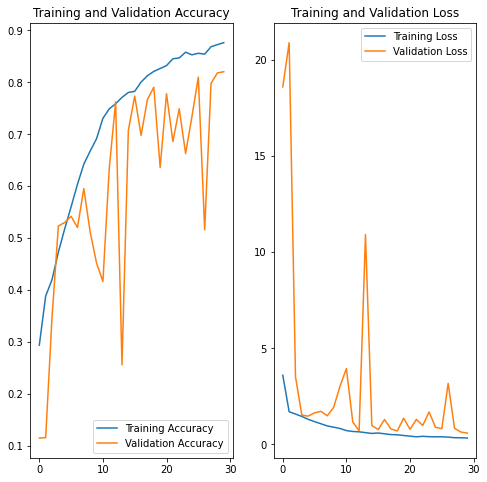

In [131]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## overfitting is not there as both train and validation accuracy move parallely except for some intermediate epochs which we can ignore.and overall we have obtained higher accuracies on both train and validation as well. so yes class rebalance help.